<a href="https://colab.research.google.com/github/carson-edmonds/AAI-521-Sports-Image-Classification/blob/main/Dataset_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import requests
from PIL import Image
from io import BytesIO
import random
import pickle
from sklearn.model_selection import train_test_split

In [ ]:
dataset_url= "https://www.kaggle.com/datasets/rishikeshkonapure/sports-image-dataset/data"

In [2]:
# Mounting your Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/Final_Project_AAI_521/data'

In [ ]:
#Load in the dataset

In [ ]:
#pre-process resize, etc.

In [ ]:
#Save the train, val, test sets to github

In [4]:
categories = ["badminton", "baseball", "basketball", "boxing",
                "chess", "cricket", "fencing", "football", "formula1",
                "gymnastics", "hockey", "ice_hockey", "kabaddi", "motogp",
                "shooting", "swimming", "table_tennis", "tennis", "volleyball",
                "weight_lifting", "wrestling", "wwe"]

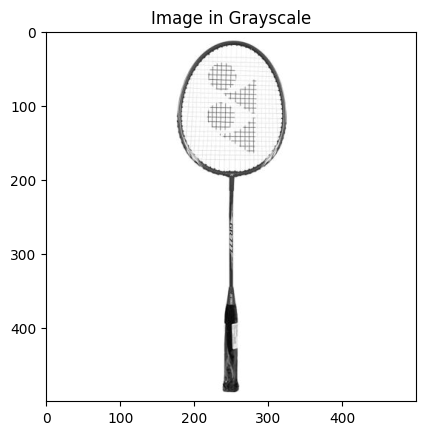

In [5]:
for i in categories:
    path = os.path.join(data_dir,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.title('Image in Grayscale')
        plt.show()
        break
    break

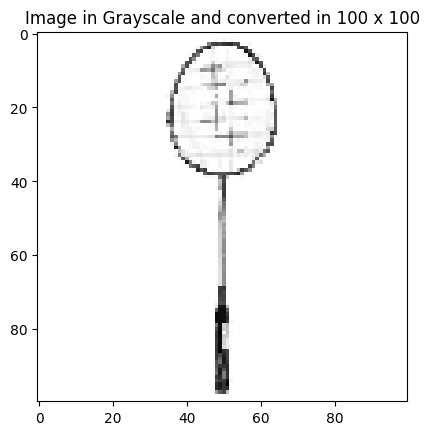

In [6]:
img_size = 100

new_array = cv2.resize(img_array,(img_size,img_size)) # resize images with grayscale into 100 * 100
plt.imshow(new_array,cmap='gray')
plt.title('Image in Grayscale and converted in 100 x 100')
plt.show()

In [7]:
#create training data

training_data =[]

def create_training_data():
    for i in categories:

        path = os.path.join(data_dir,i) #create path to sports types
        class_num = categories.index(i) #get the classification (indexing each category)

#check if any images are currupted
#if any skip tha image
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array2 = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array2,class_num])

            except Exception as e:
                pass

create_training_data()
print(len(training_data))

14275


In [8]:
#shuffle all the training data
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample) #print first 5

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0]
[array([[22, 22, 22, ..., 20, 20, 20],
       [22, 22, 22, ..., 20, 20, 20],
       [22, 22, 22, ..., 20, 20, 20],
       ...,
       [19, 19, 20, ...,  9,  9,  9],
       [19, 19, 19, ...,  9,  9,  8],
       [19, 19, 19, ...,  9,  9,  8]], dtype=uint8), 17]
[array([[25, 26, 44, ..., 80, 86, 82],
       [35, 34, 60, ..., 68, 72, 75],
       [53, 58, 68, ..., 60, 44, 59],
       ...,
       [57, 59, 58, ..., 31, 54, 56],
       [57, 58, 58, ..., 36, 33, 36],
       [56, 57, 58, ..., 47, 47, 48]], dtype=uint8), 17]
[array([[27, 33, 41, ...,  9,  8,  7],
       [29, 36, 43, ..., 10,  9,  8],
       [32, 39, 47, ..., 12, 10, 10],
       ...,
       [17, 19, 23, ..., 17, 15, 13],
       [16, 18, 21, 

In [18]:
#creating lable and features

x=[] #features
y=[] #label
#y = np.array(y)

for features,label in training_data:
    x.append(features)
    y.append(label)
    np.array((y, label))

print("Before converting into numpy array:")
print(x[0].reshape(-1,img_size,img_size,1))

x=np.array(x).reshape(-1,img_size,img_size,1)

print("After converting into numpy array:")
print(np.array(x).reshape(-1,img_size,img_size,1))

<ipython-input-18-71265e5ccbce>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array((y, label))


Before converting into numpy array:
[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]
After converting into numpy array:
[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]


 [[[ 22]
   [ 22]
   [ 22]
   ...
   [ 20]
   [ 20]
   [ 20]]

  [[ 22]
   [ 22]
   [ 22]
   ...
   [ 20]
   [ 20]
   [ 20]]

  [[ 22]
   [ 22]
   [ 22]
   

In [19]:
#dumping data into pickle file
x_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/x.pickle'
y_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/y.pickle'

#pickle file for features
pickle_out = open(x_location,"wb") #path to save pickle file
pickle.dump(x,pickle_out)
pickle_out.close()

#pickle file for label
pickle_out = open(y_location,"wb") #path to save pickle file
pickle.dump(y,pickle_out)
pickle_out.close()

In [20]:
#importing data (pickle) files x and y
pickle_in = open(x_location,"rb")   #rb - read binary form #wb - Write binary form
x = pickle.load(pickle_in)


pickle_in = open(y_location,"rb")   #rb - read binary form #wb - Write binary form
y = pickle.load(pickle_in)

In [21]:
y = np.array(y)
x = x/255.0
#print(x)

In [22]:
#create a split of data for the model fit and training
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [23]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(11420, 100, 100, 1)
(2855, 100, 100, 1)
(11420,)
(2855,)
